# Tarea 3

## PMC - multiclase

Deben hacer dos redes neuronales que clasifiquen correctamente al conjunto de flores Iris usando y la salida debe ser un vector multiclase que indique la probabilidad de pertenencia a cada una de las variedades de las flores.

- red neuronal en python del [04b](./04b.%20PMC_multiclase.ipynb)
- Red con keras o sklearn

Debes reportar las arquitecturas finales, los pesos y la matriz de confusión.

In [47]:
from sklearn.datasets        import load_iris
from sklearn.preprocessing   import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics         import multilabel_confusion_matrix


from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

iris = load_iris()
X      = iris['data']
labels = iris['target']

### Preprocesamiento de datos

Requerimos hacer nuestra etiqueta de clasificación correspondiente con un vector de probabilidades para 4 clases

In [3]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
lbls = np.zeros((len(labels), 3))
for i in range(len(labels)):
    lbls[i,labels[i]] = 1
lbls

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

También debemos escalar nuestro conjunto de entrenamiento considerando el rango de sus valores.

In [23]:
Xs = MinMaxScaler().fit_transform(X)

Ahora separamos nuestro conjunto en entrenamiento y prueba

In [24]:
Xtr, Xts, ytr, yts = train_test_split(Xs,lbls)

### Definición y arquitectura

Definimos nuestra red 

In [25]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

def dsigmoide(y):
    return y*(1-y)
    #return sigmoide(y) *(1-sigmoide (y))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

costo = lambda t, y: np.sum(-t * np.log(y))

def predict(M, b, X):
    wh, wo = M
    bh, bo = b
    
    zh = np.dot(X, wh) + bh
    ah = sigmoide(zh)

    # Salida
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)
    return ao


In [26]:
n = 4
escondidas = 3
m = 3
N = len(X)

# Una alternativa equivalente en vez de ocupar una 
# dimensión extra es la de ocupar una transformación afin
# esencialmente y = mx + b
# el proceso de optimizacion debe optimizar (m,b)

wh = np.random.rand(n,escondidas)
bh = np.random.randn(escondidas)

wo = np.random.rand(escondidas,m)
bo = np.random.randn(m)
iters = int(5e4)                   # numero de iteraciones
lr = 10e-4                         # constante de aprendizaje


Y nuestro método de descenso del gradiente 

In [27]:
def entrena(X,y, M, b, iters, lr, dim_in, dim_out, step=1000):
    """
    Entrenamiento 
    X conjunto de entrenamiento
    y etiquetas 
    iters:   numero de iteraciones
    lr:      constante de aprendizaje
    dim_in:  dimension del conjunto de entrada (Rn)
    dim_out: dimension del vector de salida (Rm)
    N:       num instancias |X|
    M, b:    [wh, wo], [bh, bo]
    """
    errores = []
    ############# desempacamos los pesos
    wh, wo = M
    bh, bo = b
    
    for epoca in range(iters):
    ############# feedforward

        # Escondidas
        zh = np.dot(X, wh) + bh
        ah = sigmoide(zh)

        # Salida
        zo = np.dot(ah, wo) + bo
        ao = softmax(zo)

    ########## Backpropagation

        grad_costo = ao - y
        dzo_dwo = ah

        deltas_wo = np.dot(dzo_dwo.T, grad_costo)
        deltas_bo = grad_costo
 
    
        dzo_dah = wo
        dcost_dah = np.dot(grad_costo , dzo_dah.T)
        dah_dzh = dsigmoide(ah)
        dzh_dwh = X
        
        deltas_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
        deltas_bh = dcost_dah * dah_dzh

    ########## Actualizacion de pesos
        
        wh -= lr * deltas_wh
        bh -= lr * deltas_bh.sum(axis=0)

        wo -= lr * deltas_wo
        bo -= lr * deltas_bo.sum(axis=0)

        if (epoca % step == 0 or epoca==iters):
            loss = costo(y,ao)
            print('Epoca {} costo {}: '.format(epoca, loss))
            errores.append(loss)
            
    return [wh,wo], [bh,bo], errores

M, b, J = entrena(Xtr, ytr, [wh, wo], [bh, bo], iters, lr, n, m, step=10000)

Epoca 0 costo 131.23203202082115: 
Epoca 10000 costo 7.921282073702634: 
Epoca 20000 costo 5.876464430370447: 
Epoca 30000 costo 5.405647030511627: 
Epoca 40000 costo 5.224606838522162: 


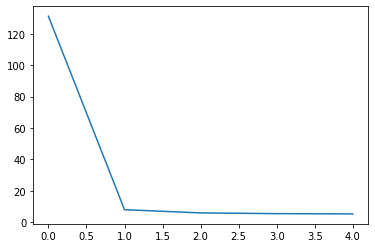

In [35]:
plt.plot(J)

### Evaluación

Evaluamos la red entrenada. Primero podemos ver el costo y después la evaluación de usando la matriz de confusión.

In [76]:
predics = predict(M, b, Xts)
costo(yts, predics)

1.8006786499044425

In [45]:
list(zip(np.argmax(yts, axis=1), np.argmax(np.round(predics), axis=1)))


[(1, 1),
 (2, 2),
 (1, 1),
 (1, 2),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (2, 2),
 (2, 2)]

## Sklearn 

Hacer la clasificación usando ```sklearn```, para eso ocuparemos ```MLPClassifier```

In [63]:
from sklearn.model_selection   import GridSearchCV
from sklearn.neural_network    import MLPClassifier

In [66]:
rfgrid = {'activation': ['relu', 'tanh', 'logistic'],
          'solver':     ['lbfgs', 'adam'],
          'hidden_layer_sizes': [(5,), (4,2), (3,2)], 
          'max_iter':   [500]}
clf = GridSearchCV(estimator = MLPClassifier(), 
                   param_grid=rfgrid,
                   cv=5)
clf.fit(Xtr, ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(5,), (4, 2), (3, 2)],
                         'max_iter': [500], 'solver': ['lbfgs', 'adam']})

In [67]:
print(clf.best_estimator_)
print(clf.best_score_)

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), max_iter=500,
              solver='lbfgs')
0.9727272727272727


In [70]:
params = clf.best_params_
mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(4,2), max_iter=300, 
                    solver='lbfgs')

In [71]:
mlp.fit(X=Xtr, y=ytr)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(4, 2), max_iter=300,
              solver='lbfgs')

In [72]:
mlp.score(Xts,yts)

0.9736842105263158

In [73]:
preds_sk = mlp.predict_proba(Xts)

In [74]:
preds_sk

array([[1.11368655e-03, 1.00000000e+00, 5.41259601e-07],
       [7.01621210e-08, 2.88011072e-02, 9.72410547e-01],
       [1.11195424e-03, 1.00000000e+00, 5.41683410e-07],
       [7.08755425e-08, 2.93261996e-02, 9.71984061e-01],
       [9.99837392e-01, 1.60006138e-08, 6.89386444e-07],
       [9.99847633e-01, 1.52932816e-08, 6.60362432e-07],
       [7.01346497e-08, 2.88070365e-02, 9.72418065e-01],
       [7.01198749e-08, 2.88103313e-02, 9.72422073e-01],
       [7.01178719e-08, 2.88108741e-02, 9.72422584e-01],
       [1.08258175e-03, 1.00000000e+00, 5.52509299e-07],
       [7.04224022e-08, 2.87742456e-02, 9.72329414e-01],
       [7.01358454e-08, 2.88067363e-02, 9.72417752e-01],
       [7.00936346e-08, 2.88163745e-02, 9.72429128e-01],
       [1.05906924e-03, 1.00000000e+00, 5.96196818e-07],
       [1.10802861e-03, 1.00000000e+00, 5.43048502e-07],
       [7.01378289e-08, 2.88062830e-02, 9.72417218e-01],
       [7.01359237e-08, 2.88066664e-02, 9.72417748e-01],
       [9.99847741e-01, 1.52858

In [77]:
list(zip(np.argmax(yts, axis=1), np.argmax(np.round(preds_sk), axis=1)))


[(1, 1),
 (2, 2),
 (1, 1),
 (1, 2),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 1),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (2, 2),
 (2, 2)]